<a href="https://colab.research.google.com/github/GJ-007-sage/Physics-n-Maths/blob/main/24B1809_Guru_Jahnavi_CPP_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Python


## 1.a
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below:


Ex:

 n = 3

--A--

-BAB-

CBABC

n = 4

---A---

--BAB--

-CBABC-

DCBABCD

In [29]:
def F(n):
    for i in range(n):
        row = ''.join(chr(65 + abs(j)) for j in range(-i, i + 1))
        print(row.center(2 * n - 1, '-'))


In [30]:
#tests

F(10)

---------A---------
--------BAB--------
-------CBABC-------
------DCBABCD------
-----EDCBABCDE-----
----FEDCBABCDEF----
---GFEDCBABCDEFG---
--HGFEDCBABCDEFGH--
-IHGFEDCBABCDEFGHI-
JIHGFEDCBABCDEFGHIJ


In [31]:
F(6)

-----A-----
----BAB----
---CBABC---
--DCBABCD--
-EDCBABCDE-
FEDCBABCDEF


## 1.b
Make a function F that takes only one argument, a dictionary(dict) d. The keys of d are integers and the values of d are a tuple of type (x (int), y (int)). You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [32]:
def extract_key(list):
    return list[0]

def extract_x(list):
    return list[1][0]

def extract_y(list):
    return list[1][1]

def F(d):
    print("Sorted by key (ascending):")
    for key, (x, y) in sorted(d.items(), key=extract_key):
        print(f"-{key}-, -{x}-, -{y}-")

    print("\nSorted by x (descending):")
    for key, (x, y) in sorted(d.items(), key=extract_x, reverse=True):
        print(f"-{key}-, -{x}-, -{y}-")

    print("\nSorted by y (ascending):")
    for key, (x, y) in sorted(d.items(), key=extract_y):
        print(f"-{key}-, -{x}-, -{y}-")




In [33]:
# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})

Sorted by key (ascending):
-1-, -1-, -2-
-2-, --1-, -4-
-4-, -2-, -3-
-5-, --4-, -3-

Sorted by x (descending):
-4-, -2-, -3-
-1-, -1-, -2-
-2-, --1-, -4-
-5-, --4-, -3-

Sorted by y (ascending):
-1-, -1-, -2-
-5-, --4-, -3-
-4-, -2-, -3-
-2-, --1-, -4-


In [34]:
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

Sorted by key (ascending):
--8-, -4-, -2-
-5-, -9-, --10-
-6-, --3-, -4-
-7-, -2-, -1-

Sorted by x (descending):
-5-, -9-, --10-
--8-, -4-, -2-
-7-, -2-, -1-
-6-, --3-, -4-

Sorted by y (ascending):
-5-, -9-, --10-
-7-, -2-, -1-
--8-, -4-, -2-
-6-, --3-, -4-


# 2 Working with Student Records

Use the data in student_records.csv to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

## 2.a: open the student_records.csv file and print out the first 10 rows

In [35]:
from google.colab import files
uploaded = files.upload()

Saving student_records.csv to student_records.csv


In [36]:
with open('student_records.csv', 'r') as file:
    for i in range(11):  # Read the header + first 10 rows
        print(file.readline())


roll_number,department,credit,course_name,course_type,grade

588946,MA,3,EC250,hasmed_elective,AB

145372,EP,4,EP407,hasmed_elective,CC

834515,MA,8,EP885,hasmed_elective,BB

344265,CSE,6,CSE699,honours,AB

358405,MA,3,EE460,minor,AP

781075,CE,8,CE540,honours,CC

180828,CSE,6,CE880,minor,AB

981238,MM,4,CSE226,minor,AB

836881,MM,8,MM530,core,AA

310604,EE,8,EE202,core,AB



## 2.b: Print out the total credits and calculte CPI of each student.
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=9, BC=7, CC=6)

In [37]:
import csv
grade_to_points = {"AP": 10, "AA": 10, "AB": 9, "BB": 8, "BC": 7, "CC": 6}

students = {}

with open("student_records.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        roll_number = row["roll_number"]
        credit = int(row["credit"])
        grade = row["grade"]

        if roll_number not in students:
            students[roll_number] = {"total_credits": 0, "weighted_sum": 0}

        students[roll_number]["total_credits"] += credit

        if grade in grade_to_points:
            points = grade_to_points[grade]
            students[roll_number]["weighted_sum"] += points * credit

sorted_students = sorted(students.items())

print("Roll Number | Total Credits | CPI")
print("---------------------------------")
for roll_number, data in sorted_students:
    cpi = (
        round(data["weighted_sum"] / data["total_credits"], 2)
        if data["total_credits"] > 0
        else "N/A"
    )
    print(f"{roll_number}      |           {data['total_credits']} | {cpi}")


Roll Number | Total Credits | CPI
---------------------------------
124663      |           229 | 8.13
138296      |           200 | 8.28
143142      |           234 | 8.78
143856      |           201 | 8.49
144528      |           228 | 8.16
145372      |           173 | 7.75
150503      |           173 | 8.29
159438      |           176 | 8.38
180828      |           177 | 8.1
194063      |           157 | 8.14
199713      |           172 | 8.29
203200      |           157 | 8.79
207443      |           161 | 8.3
208100      |           182 | 8.59
214270      |           229 | 7.88
265922      |           236 | 8.35
270007      |           241 | 8.03
282482      |           228 | 8.29
283796      |           211 | 8.82
294697      |           269 | 8.57
301135      |           206 | 8.33
310604      |           198 | 8.33
327122      |           246 | 8.16
329535      |           157 | 8.23
344265      |           153 | 8.7
358405      |           206 | 8.59
362471      |           2

## 2.c: Print out the names of all students who meet the graduation requirements
Atleast 20 credits of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [38]:
num_items = len(students)
print(f"The dictionary has {num_items} students.")

The dictionary has 100 students.


In [56]:
import csv

students_2 = {}


with open('student_records.csv', 'r') as file:
    reader = csv.DictReader(file)

    for row in reader:
        roll_no = row['roll_number']
        course_type = row['course_type']
        credits = int(row['credit'])


        if roll_no not in students_2:
            students_2[roll_no] = {
                'core_credits': 0,
                'department_elective_credits': 0,
                'flexible_elective_credits': 0,
                'hasmed_elective_credits': 0
            }


        if course_type == 'core':
            students_2[roll_no]['core_credits'] += credits
        elif course_type == 'department_elective':
            students_2[roll_no]['department_elective_credits'] += credits
        elif course_type == 'flexible_elective':
            students_2[roll_no]['flexible_elective_credits'] += credits
        elif course_type == 'hasmed_elective':
            students_2[roll_no]['hasmed_elective_credits'] += credits




print("Data after processing:")
print("Roll Number | Core Credits | department elective credits | flexible elective credits | hasmed elective credits |")
print("----------------------------------------------------------------------------------------------------------------")
for roll_no, data in students_2.items():
    print(f"{roll_number}      |{data['core_credits']:>14}|{data['department_elective_credits']:>29}|{data['flexible_elective_credits']:>27}|{data['hasmed_elective_credits']:>25}|")





Data after processing:
Roll Number | Core Credits | department elective credits | flexible elective credits | hasmed elective credits |
----------------------------------------------------------------------------------------------------------------
998293      |            34|                           30|                         25|                       26|
998293      |            20|                           31|                          8|                       39|
998293      |            50|                           15|                         53|                       28|
998293      |            11|                           18|                         20|                       31|
998293      |            15|                           12|                         49|                       44|
998293      |            63|                           23|                         46|                       36|
998293      |            29|                           22|               

In [57]:
print("\nStudents meeting graduation requirements:")
for roll_no, data in students_2.items():
    if (data['core_credits'] >= 20 and
        data['department_elective_credits'] >= 15 and
        data['flexible_elective_credits'] >= 10 and
        data['hasmed_elective_credits'] >= 5):
        print(f"Student {roll_no} ")



Students meeting graduation requirements:
Student 588946 
Student 834515 
Student 781075 
Student 180828 
Student 981238 
Student 836881 
Student 310604 
Student 773982 
Student 500658 
Student 810863 
Student 124663 
Student 871746 
Student 986057 
Student 379479 
Student 144528 
Student 485484 
Student 845623 
Student 150503 
Student 214270 
Student 517837 
Student 482623 
Student 721490 
Student 955757 
Student 143856 
Student 571782 
Student 973158 
Student 703403 
Student 960395 
Student 521087 
Student 461971 
Student 879634 
Student 716985 
Student 265922 
Student 283796 
Student 203200 
Student 327122 
Student 534763 
Student 391848 
Student 971123 
Student 207443 
Student 488661 
Student 782129 
Student 928288 
Student 581858 
Student 282482 
Student 572815 
Student 608952 
Student 628849 
Student 630568 
Student 388969 
Student 159438 
Student 970791 
Student 143142 
Student 998293 
Student 681499 
Student 888886 
Student 608522 
Student 362471 
Student 692318 
Student 62600

In [58]:
num_items = len(students_2)
print(f"The dictionary has {num_items} students.")

The dictionary has 100 students.


##2.d: Print out the names of all students who completed a minor
Atleast 10 credits with minor tag in a specific department

In [61]:
import csv

students_minor = {}

with open('student_records.csv', 'r') as file:
    reader = csv.DictReader(file)

    for row in reader:
        roll_no = row['roll_number']
        course_type = row['course_type']
        course_name = row['course_name']
        credits = int(row['credit'])


        course_department = course_name[:2]

        if course_type == 'minor' and course_department:
            if roll_no not in students_minor:
                students_minor[roll_no] = {}


            if course_department not in students_minor[roll_no]:
                students_minor[roll_no][course_department] = 0


            students_minor[roll_no][course_department] += credits

print("Roll number| Depatment of minor | Credits |")
print("--------------------------------------------")
for roll_no, departments in students_minor.items():
    for department, credits in departments.items():
        if credits >= 10:
          print(f"{roll_no:>12}|{department:>20}|{credits:>9}|")




Roll number| Depatment of minor | Credits |
--------------------------------------------
      358405|                  CH|       12|
      847809|                  ME|       20|
      847809|                  EP|       16|
      847809|                  CH|       12|
      847809|                  EE|       10|
      781075|                  EC|       11|
      124663|                  CE|       17|
      364146|                  MM|       10|
      364146|                  EC|       12|
      721490|                  ME|       14|
      571782|                  MA|       17|
      716985|                  CS|       12|
      716985|                  CE|       16|
      482623|                  CS|       11|
      482623|                  CH|       16|
      329535|                  EP|       11|
      810863|                  EP|       18|
      810863|                  CS|       10|
      973158|                  ME|       12|
      973158|                  CH|       11|
      14314

##2.e: Print out the names of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [63]:
import csv

students_honours = {}

with open('student_records.csv', 'r') as file:
    reader = csv.DictReader(file)

    for row in reader:
        roll_no = row['roll_number']
        course_type = row['course_type']
        course_name = row['course_name']
        credits = int(row['credit'])


        if roll_no not in students_honours:
            students_honours[roll_no] = {
                'honours_credits': 0,
                'core_credits': 0
            }


        if course_type == 'honours':
            students_honours[roll_no]['honours_credits'] += credits
        elif course_type == 'core':
            students_honours[roll_no]['core_credits'] += credits

print("Data after processing:")
print("Roll Number | Honours Credits | Core Credits |")
print("------------------------------------------------")
for roll_no, data in students_honours.items():
    print(f"{roll_no:>12}|{data['honours_credits']:>17}|{data['core_credits']:>14}|")




Data after processing:
Roll Number | Honours Credits | Core Credits |
------------------------------------------------
      588946|               20|            34|
      145372|               18|            20|
      834515|               32|            50|
      344265|               27|            11|
      358405|               34|            15|
      781075|               32|            63|
      180828|                7|            29|
      981238|                8|            64|
      836881|               28|            24|
      310604|               31|            26|
      847809|               16|            15|
      773982|               57|            53|
      500658|               26|            34|
      810863|               13|            46|
      124663|               43|            53|
      364146|               40|            21|
      871746|               28|            31|
      270007|               37|            17|
      597353|               18|    

In [64]:
print("\nStudents meeting honours requirements:")
for roll_no, data in students_honours.items():
    if data['honours_credits'] >= 10 and data['core_credits'] >= 20:
        print(f"Student-{roll_no}")


Students meeting honours requirements:
Student-588946
Student-145372
Student-834515
Student-781075
Student-836881
Student-310604
Student-773982
Student-500658
Student-810863
Student-124663
Student-364146
Student-871746
Student-986057
Student-718510
Student-379479
Student-582912
Student-788020
Student-613401
Student-144528
Student-485484
Student-199713
Student-845623
Student-150503
Student-214270
Student-517837
Student-482623
Student-721490
Student-955757
Student-589528
Student-143856
Student-571782
Student-973158
Student-703403
Student-960395
Student-521087
Student-461971
Student-879634
Student-716985
Student-265922
Student-283796
Student-203200
Student-327122
Student-534763
Student-391848
Student-971123
Student-207443
Student-488661
Student-782129
Student-928288
Student-581858
Student-282482
Student-572815
Student-608952
Student-628849
Student-630568
Student-388969
Student-159438
Student-870642
Student-970791
Student-143142
Student-998293
Student-681499
Student-888886
Student-608522


# SciPy

## Part A

Minimize the function
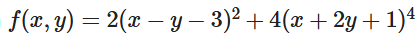

With the constraints :
image.png
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [65]:
import numpy as np
from scipy.optimize import minimize

def function(var):
  x, y = var[0], var[1]
  return 2*(x - y - 3)**2 + 4*(x + 2*y + 1)**4
def constraint1(var):
  x, y = var[0], var[1]
  return x - y + 3
def constraint2(var):
  x, y = var[0], var[1]
  return 5 - ((x + 2)**2 + (y + 1)**2)




constraints = [
    {'type': 'ineq', 'fun': constraint1},
    {'type': 'ineq', 'fun': constraint2}
]

result = minimize(function, (0,0), constraints=constraints)


if result.success:
    optimal_x, optimal_y = result.x
    optimal_value = function(result.x)
    print(f"Optimal solution: x = {optimal_x}, y = {optimal_y}")
    print(f"Value of the objective function at the optimal solution: {optimal_value}")
else:
    print("Optimization did not converge.")


Optimal solution: x = 0.2349250275449747, y = -0.928514887569978
Value of the objective function at the optimal solution: 7.345026216976594


## Part B
Evaluate the line integral of the function

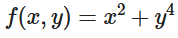
 along the circle
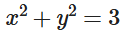

 anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [66]:
import numpy as np
from scipy.integrate import quad

def integrand(theta):

  x = np.sqrt(3) * np.cos(theta)
  y = np.sqrt(3) * np.sin(theta)

  f = x**2 + y**4

  dx_dtheta = np.sqrt(3) * -np.sin(theta)
  dy_dtheta = np.sqrt(3) * np.cos(theta)


  arc_length_differential = np.sqrt(dx_dtheta**2 + dy_dtheta**2)

  return f * arc_length_differential


result, error = quad(integrand, 0, 2 * np.pi)

print(f"The line integral is: {result:.4f}")
print(f"The estimated error is: {error}")

The line integral is: 53.0536
The estimated error is: 5.376843748017279e-09


# Numpy



In [67]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [68]:
from google.colab import files
uploaded = files.upload()

Saving spice_locations.txt to spice_locations (1).txt


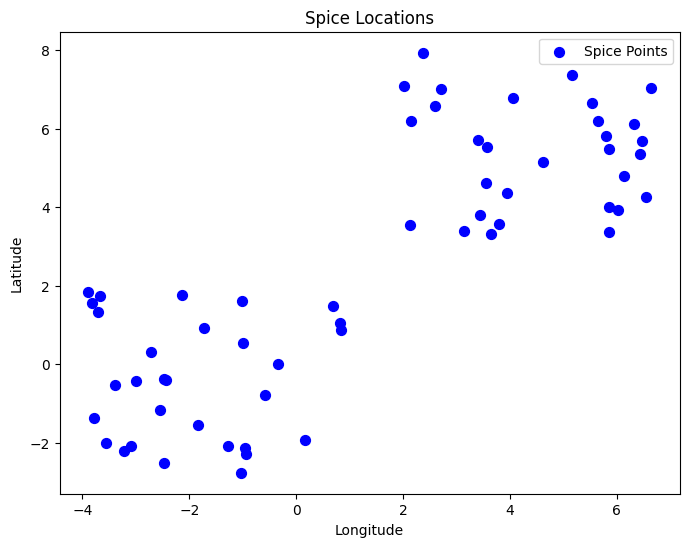

In [69]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spice_locations(data_path):

    data = np.loadtxt(data_path, delimiter=',')

    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], color='blue', s=50, label='Spice Points')

    plt.title('Spice Locations')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()

    plt.show()

data_path = 'spice_locations.txt'
plot_spice_locations(data_path)


from the above graph , it feels better to make 2 clusters. i.e, K = 2



---



### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2

In [70]:
def load_data(data_path):
    return np.loadtxt(data_path, delimiter=',')
spice_points = load_data('spice_locations.txt')
print(spice_points)


[[-2.12729941e+00  1.75357153e+00]
 [-3.40030291e-01 -6.70757901e-03]
 [-3.21990680e+00 -2.22002740e+00]
 [-3.70958194e+00  1.33088073e+00]
 [-9.94424941e-01  5.40362889e-01]
 [-3.89707753e+00  1.84954926e+00]
 [ 1.62213204e-01 -1.93830445e+00]
 [-3.09087516e+00 -2.08297745e+00]
 [-2.47878879e+00 -3.76217842e-01]
 [-1.84027491e+00 -1.54385430e+00]
 [-9.40735526e-01 -2.30253070e+00]
 [-2.53927676e+00 -1.16819078e+00]
 [-1.71965008e+00  9.25879807e-01]
 [-3.00163109e+00 -4.28827808e-01]
 [-1.03792716e+00 -2.76774794e+00]
 [-9.62275740e-01 -2.14737938e+00]
 [-3.67474204e+00  1.74442769e+00]
 [ 8.28160165e-01  1.04198674e+00]
 [-2.47693115e+00 -2.51163943e+00]
 [-5.78834867e-01 -7.99237531e-01]
 [-3.38980883e+00 -5.24115449e-01]
 [-3.82805739e+00  1.54660201e+00]
 [-2.70610009e+00  3.12611422e-01]
 [-2.44144462e+00 -3.99659894e-01]
 [-1.26644860e+00 -2.07572772e+00]
 [ 8.47923139e-01  8.75664117e-01]
 [ 6.97494708e-01  1.47413675e+00]
 [-1.01050011e+00  1.60937118e+00]
 [-3.55753749e+00 -2

In [71]:
len(spice_points)

60

### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2

In [72]:
def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        return data[np.random.choice(data.shape[0], size=K, replace=False)]
    else:
        return init_centers


In [114]:
K = 2
init_centers = None
centers = initialise_centers(spice_points, K, init_centers)
print(centers)


[[6.64848826 7.0406019 ]
 [3.40467255 5.71348042]]


### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N

In [115]:
import numpy as np

def initialise_labels(data):
    return np.ones(data.shape[0], dtype=int)

labels = initialise_labels(spice_points)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [116]:
len(labels)

60

### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK

In [117]:
import numpy as np

def calculate_distances(data, centers):
    data_x = data[:, 0][:, None]
    data_y = data[:, 1][:, None]

    centers_x = centers[:, 0][None, :]
    centers_y = centers[:, 1][None, :]

    diff_x_squared = (data_x - centers_x) ** 2
    diff_y_squared = (data_y - centers_y) ** 2
    distances = np.sqrt(diff_x_squared + diff_y_squared)

    return distances


In [118]:
data = spice_points
centers = centers
distances = calculate_distances(data, centers)
print(distances)


[[10.2453472   6.80320454]
 [ 9.92491624  6.83691086]
 [13.53308819 10.33564694]
 [11.82753288  8.35582413]
 [10.03330601  6.79067034]
 [11.75397743  8.26108456]
 [11.07666571  8.31043646]
 [13.34522012 10.14775322]
 [11.76079935  8.46755822]
 [12.07277882  8.95423816]
 [12.03704467  9.11805931]
 [12.32068599  9.09329049]
 [10.36414809  7.01283124]
 [12.20316285  8.87517192]
 [12.46132852  9.57433687]
 [11.9307472   8.99240536]
 [11.60252322  8.11612533]
 [ 8.35820573  5.33491042]
 [13.21054858 10.11166943]
 [10.66289275  7.63438448]
 [12.56950106  9.22347978]
 [11.82971021  8.34717066]
 [11.52276786  8.15542324]
 [11.74667508  8.45857969]
 [12.07284935  9.08246311]
 [ 8.46481031  5.47187665]
 [ 8.14861083  5.02999469]
 [ 9.38926887  6.02805626]
 [13.64767457 10.40578749]
 [13.39477421 10.08734467]
 [ 3.81059875  1.45977506]
 [ 2.31260225  2.89250253]
 [ 3.50479554  0.        ]
 [ 3.94397834  1.47430997]
 [ 4.36816291  2.44897843]
 [ 3.14708395  2.99878429]
 [ 4.62102346  1.93812357]
 

In [119]:
len(distances)

60

### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N

In [120]:
import numpy as np

def update_labels(distances):
    labels = np.argmin(distances, axis=1)
    return labels


In [121]:
updated_labels = update_labels(distances)
print(updated_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0]


In [122]:
len(updated_labels)

60

### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2

In [123]:
import numpy as np

def update_centers(data, labels, K):
    sum_centers = np.zeros((K, data.shape[1]))
    count_centers = np.zeros(K)

    np.add.at(sum_centers, labels, data)
    np.add.at(count_centers, labels, 1)
    new_centers = sum_centers / count_centers[:, np.newaxis]

    return new_centers


In [124]:
updated_centres = update_centers(spice_points, updated_labels, K)
print(updated_centres)

[[6.0502256  5.88278148]
 [0.22111829 1.71771787]]


rechecking using for/while loop


In [125]:
def update_center(data, labels, K):

    new_centers = np.zeros((K, 2))
    for k in range(K):
        cluster_points = data[labels == k]
        if len(cluster_points) > 0 :
          new_centers[k] = np.mean(cluster_points, axis=0)
    return  new_centers

In [126]:
updated_centres_2 = update_center(spice_points, updated_labels, K)
print(updated_centres_2)

[[6.0502256  5.88278148]
 [0.22111829 1.71771787]]




---

### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False

In [127]:
def check_termination(labels1, labels2):
    return np.array_equal(labels1, labels2)


In [128]:
converged = check_termination(updated_labels, labels)
print(converged)

False




---



In [129]:
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new

    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time

In [130]:
final_centres, final_labels, time_taken = kmeans('spice_locations.txt', 2, None)
print(final_centres)
print(final_labels)
print(time_taken)

[[-1.93560779 -0.38938452]
 [ 4.51518371  5.35201025]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.00042891502380371094


### Todo 7

visualise the graph

In [131]:
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


    plt.title('K-means clustering')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.savefig('kmeans.png')

    return plt


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

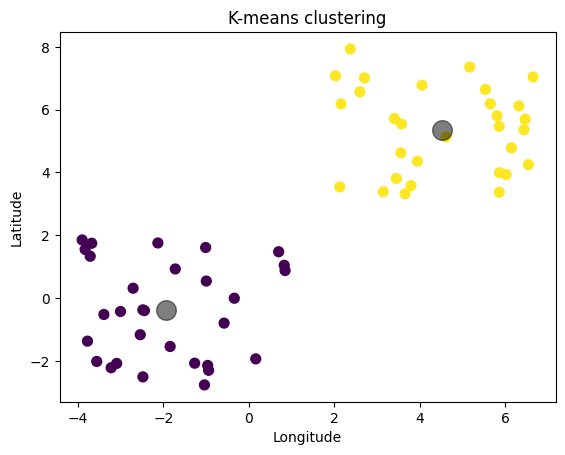

In [132]:
visualise('spice_locations.txt', final_labels, final_centres)

Time taken for the algorithm to converge: 0.00037384033203125


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

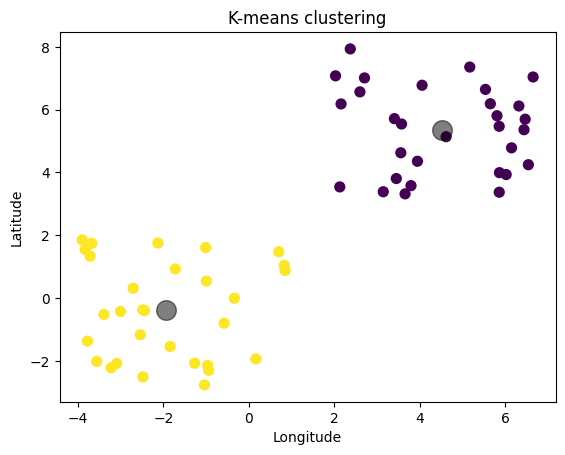

In [133]:
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)